In [1]:
#import 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# import the data 
dfc = pd.read_csv(r"C:\Users\RaefS\saudi-arabia-used-cars-dataset\saudi-arabia-used-cars-dataset\UsedCarsSA_Clean_EN.csv")
dfc.shape


(8035, 13)

In [3]:
duplicateOFRow = dfc[dfc.duplicated()] # check 
dfc = dfc.drop_duplicates() 
dfc = dfc[dfc['Price'] > 7000]
dfc.shape

(5385, 13)

<AxesSubplot:xlabel='Engine_Size', ylabel='count'>

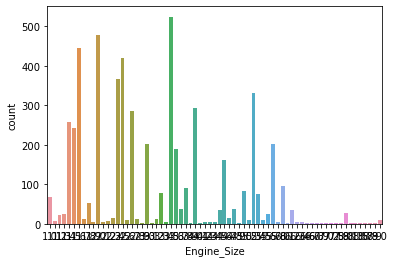

In [4]:
sns.countplot(x= 'Engine_Size' , data = dfc)
# len(x)


In [5]:
#what is my goal from this graph ? 
# To see the engine size for the cars over the years 
copydf = dfc.copy()

In [6]:
copydf['Engine_class'] = copydf['Engine_Size'].apply(lambda x : 'Small' if x < 5 else 'Large') 

In [7]:
# mask = copydf['Engine_Size'] == 9
# values = copydf.loc[mask , :]
# sns.countplot(x= values.Engine_Size , data = copydf)
dfc


,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000,False
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


## First plot 
### Q

[Text(0.5, 0, 'Cars model year'), Text(0, 0.5, 'Number of cars')]

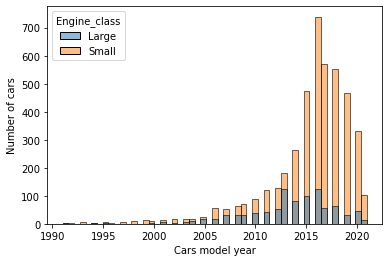

In [8]:
# make a new column that classifies the engine size
dfc['Engine_class'] = dfc['Engine_Size'].apply(lambda x : 'Small' if x < 5 else 'Large') 

ax = sns.histplot(x = 'Year' , hue = 'Engine_class', data = dfc[dfc["Year"] > 1990 ]) 
ax.set(xlabel='Cars model year', ylabel='Number of cars')



## Second plot 
### corr matrix to show which variable affect the price for the overall dataset 

<AxesSubplot:>

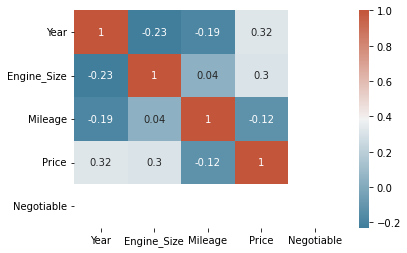

In [9]:
# first a general corr then a corr based on every car cmopany 
# General corr 
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(dfc.corr(), annot=True, cmap=cmap)

In [10]:
sum(list(top.values()))/ len(dfc) * 100 

NameError: name 'top' is not defined

## Third plot 
### more analysis to see What is the variable that affect the price for the top car makers ? 

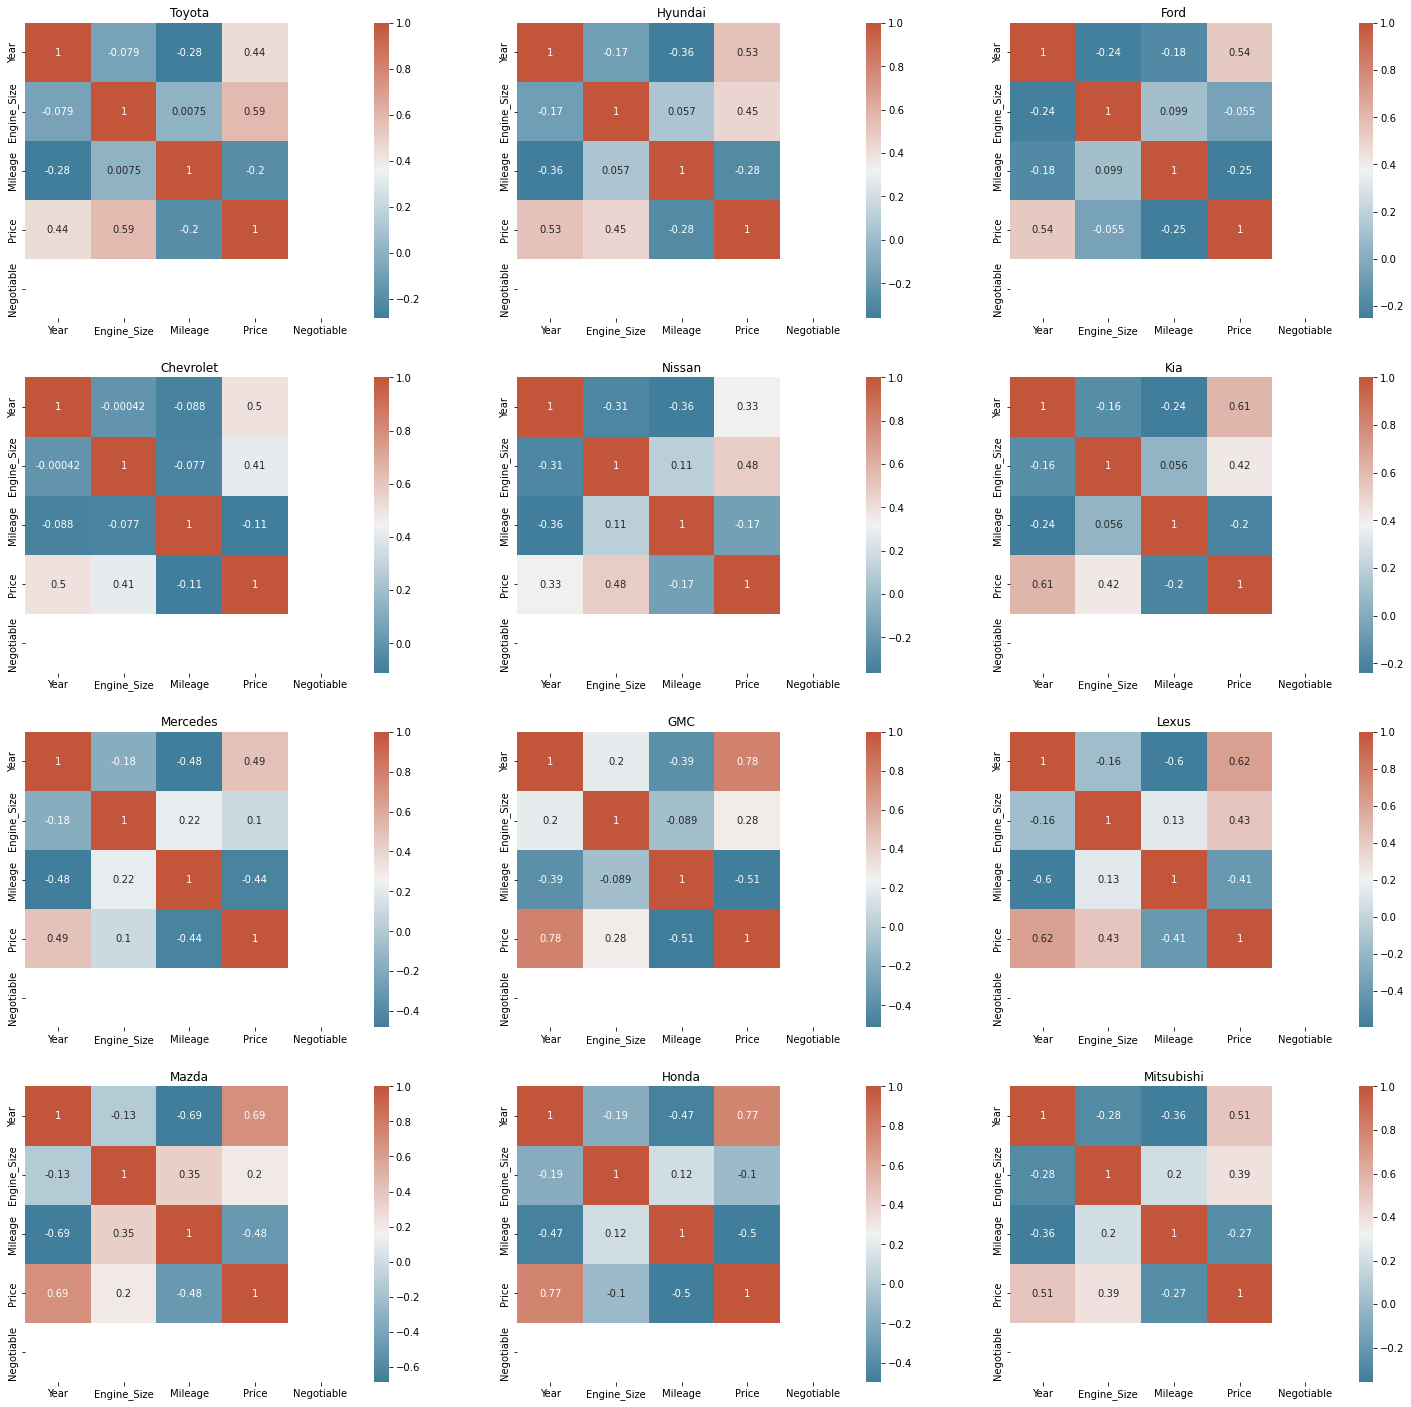

In [11]:

# First we take the unique values in 'Make' and the count for them. 
# The following code will creat a list for the maker names and for the count and make it a dict
maker_name, cars_counts = np.unique(dfc['Make'],return_counts=True)
d = dict(zip(maker_name,cars_counts))
top = {}
# Creat a new dict where we only have the top 12 cars makers as they represent 85% of the dataset 
for key, value in sorted(d.items(), key=lambda item: item[1], reverse= True)[:12]:
    top[key] = value  
nCols=3   # The number of columns that you want
nRows=4   # The number of correspomding rows 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,v in enumerate(top.keys()):
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    ax = sns.heatmap(dfc[dfc["Make"]== v ].corr(), annot=True, cmap=cmap,ax=axes.flatten()[ind])
    ax.title.set_text(v) 

plt.show() 

In [12]:
len(dfc[dfc["Year"] > 1990]) / len(dfc)  *100


99.44289693593315

## Fourth plot 
### regarding the average price of used cars in the Fuel & Gear 

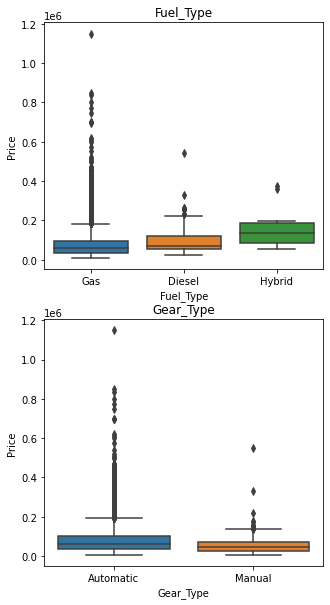

In [13]:

col = dfc.loc[:,['Fuel_Type','Gear_Type']]
col 
fig,axes = plt.subplots(2, 1, figsize=(5,10))
for ind,c in enumerate(col):
    ax = sns.boxplot(y='Price', x = c ,data=dfc,ax=axes.flatten()[ind])
    ax.title.set_text(c) 

plt.show() 


### More details for which cars have a higher price 
### The plot shows that Automatic cars in general have higher average price 

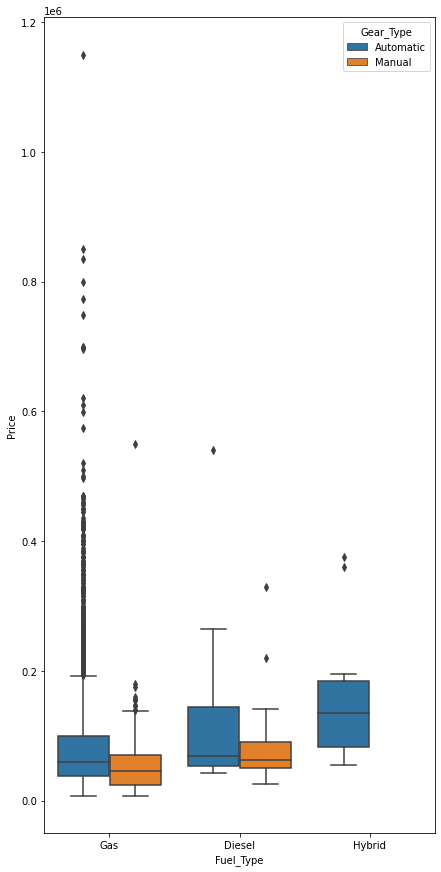

In [14]:
plt.figure(figsize=(7,15)) 

sns.boxplot(y='Price', x = 'Fuel_Type', hue = 'Gear_Type',data=dfc)
plt.show()


In [15]:

d = dict(dfc.nunique()) 
s = pd.DataFrame(d.items(), columns=['Variable Name', 'Unique Values'])
s 

,Variable Name,Unique Values
0,Make,57
1,Type,349
2,Year,46
3,Origin,4
4,Color,15
5,Options,3
6,Engine_Size,69
7,Fuel_Type,3
8,Gear_Type,2
9,Mileage,1694


In [16]:
### Make a table for the report that shows the variable name and the count of the unique values
from tabulate import tabulate

print(tabulate(s, headers = 'keys', tablefmt = 'github'))


|    | Variable Name   |   Unique Values |
|----|-----------------|-----------------|
|  0 | Make            |              57 |
|  1 | Type            |             349 |
|  2 | Year            |              46 |
|  3 | Origin          |               4 |
|  4 | Color           |              15 |
|  5 | Options         |               3 |
|  6 | Engine_Size     |              69 |
|  7 | Fuel_Type       |               3 |
|  8 | Gear_Type       |               2 |
|  9 | Mileage         |            1694 |
| 10 | Region          |              27 |
| 11 | Price           |             451 |
| 12 | Negotiable      |               1 |
| 13 | Engine_class    |               2 |


## Plot 
### show the density distribution for the price based on the car origin

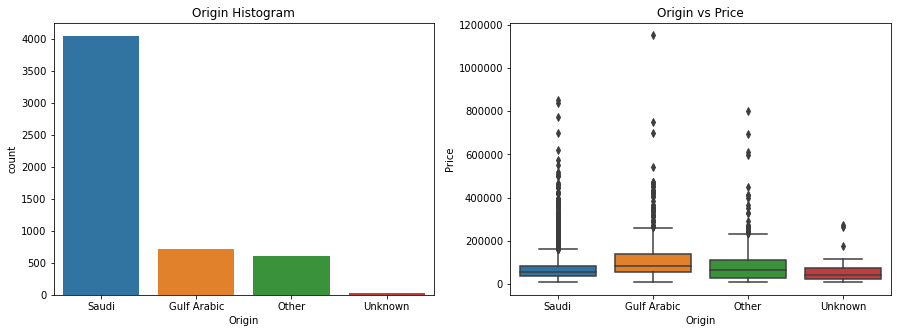

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Origin Histogram')
sns.countplot(x = 'Origin' , data = dfc)

plt.subplot(1,2,2)
plt.title('Origin vs Price')
sns.boxplot(x = 'Origin' , y = 'Price',data = dfc)

plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()
# the plot show that the saudi cars price have a high density between 0-200K. The gulf cars  
# have highest average